# What is Autoencoder?

Autoencoder is **a neural network model that has the same input and output**. The autoencoder studies the input data and attempts to reconstruct the input data.

Then what's the use of Autoencoder? Autoencoder is used to **reduce the dimensions of features (Dimensionality Reduction)**. If the data form by very high dimension (data with a very large number of features). For example, it can be each feature spread over each dimension of the data, so that each of the existing data looks very different. To overcome these problems require very much data or reduce the dimensions of the data. PCA can be use here, t-SNE, or Autoencoder.

<img src="img/decoder.png">

Autoencoder consists of two main parts, **encoder** and **decoder**. Between the encoder and decoder, there is a **code layer**. The number of neurons in the code layer is **the number of dimensions that expect to reduce the dimensions of our data**.

# Let's Code

For the example of implementation, the MNIST data will be used as dimensionality reduction example. MNIST is a dataset consisting of numbers from 0 to 9 written by hand.

<img src="img/mnist.png">

MNIST data has often been used as a benchmark whether a model can recognize or classify these numbers. Each data is an image measuring 28x28 pixels so that there are a total of 784 dimensions and it will be reduce to 16x16 pixel only.

# Dependency

The dependency that needed in the autoencoder which is exemplified this time was almost same with the example in the previous parts. But this time MNIST data will be loaded from a package that has been provided by Keras. Because the important of new optimizers that gonna be try, that is ADAM.

**ADAM is a variant of the other gradient descent algorithm**, for more details you might read it yourself in the paper [https://arxiv.org/abs/1412.6980](https://arxiv.org/abs/1412.6980).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input, Activation, Dense
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.python.keras.datasets import mnist

# Data Preparation

The data from **MNIST is a grayscale image with a range from 0 to 255**. This range of data is "too big" for our model, especially with a **fairly small learning rate**, so the data need to be scaling by dividing it by 255. So the new range will be got in between 0 and 1.

After that, 784 vector the previous dimension of input will be change.

In [2]:
# Download and Save MNIST Dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

# Scale from 0 to 1
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

# Reshape from 28x28 matrix to 784 vector
train_x = np.reshape(train_x, (len(train_x), np.prod(train_x.shape[1:])))
test_x = np.reshape(test_x, (len(test_x), np.prod(test_x.shape[1:])))

# Create the Autoencoder

As explained above, an autoencoder consists of an encoder and decoder. **The number of neurons in each layer of the encoder is** `784-256-128-64-32-16` and for **the decoder is** `16-32-64-128-256-784`.

The optimizer that used was `ADAM` with a learning rate of 0.001 and the Loss function that will be used was `binary_crossentropy`. Why crossentropy?

***The data we have has a range from 0 to 1, the activation function at the output layer is also sigmoid which has a range from 0 to 1. It is all identical to the probability distribution, so we can think of this as a classification problem and we can use binary crossentropy.***

***Actually we can also think of this as a regression using Linear activation at the output layer, but the loss function that we use must be MSE (Mean Squared Error). Later the results will be compared at the end of this part.***

Also remember if the autoencoder is trying to reconstruct the input data, so the target that will be use is the input itself (`train_x` and `test_x`).

# Linear & Mean Squared Error

In [3]:
# Target Dimension
TARGET_DIM = 16

# Encoder
inputs = Input(shape=(784,))
h_encode = Dense(256, activation='relu')(inputs)
h_encode = Dense(128, activation='relu')(h_encode)
h_encode = Dense(64, activation='relu')(h_encode)
h_encode = Dense(32, activation='relu')(h_encode)

# Coded
encoded = Dense(TARGET_DIM, activation='relu')(h_encode)

# Decoder
h_decode = Dense(32, activation='relu')(encoded)
h_decode = Dense(64, activation='relu')(h_decode)
h_decode = Dense(128, activation='relu')(h_decode)
h_decode = Dense(256, activation='relu')(h_decode)
outputs = Dense(784, activation='linear')(h_decode)

# Autoencoder Model
autoencoder = Model(inputs=inputs, outputs=outputs)

# Encoder Model
encoder = Model(inputs=inputs, outputs=encoded)

# Optimizer / Update Rule
adam = Adam(lr=0.001)

# Compile the model Binary Crossentropy
autoencoder.compile(optimizer=adam, loss='mse')

autoencoder.fit(train_x, train_x, batch_size=256, epochs=100, verbose=1, 
                shuffle=True, validation_data=(test_x, test_x))

autoencoder.save_weights('6_autoencoder_weights_linear_mse.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0533 - val_loss: 0.0376
Epoch 2/100
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0339 - val_loss: 0.0311
Epoch 3/100
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0294 - val_loss: 0.0277
Epoch 4/100
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0265 - val_loss: 0.0252
Epoch 5/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0244 - val_loss: 0.0236
Epoch 6/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0231 - val_loss: 0.0223
Epoch 7/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0221 - val_loss: 0.0216
Epoch 8/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0213 - val_loss: 0.0209
Epoch 9/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.02

Epoch 76/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0138 - val_loss: 0.0142
Epoch 77/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0138 - val_loss: 0.0143
Epoch 78/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0138 - val_loss: 0.0141
Epoch 79/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0137 - val_loss: 0.0142
Epoch 80/100
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0137 - val_loss: 0.0143
Epoch 81/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0137 - val_loss: 0.0140
Epoch 82/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0137 - val_loss: 0.0141
Epoch 83/100
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0136 - val_loss: 0.0143
Epoch 84/100
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0136 - val_loss: 0.0141
Epoch 85/100
60000/

# Reconstruction Result

After the training is finished, digits 0 through 9 in the test data will be reconstruct.

The output of the encoder can be also take which is a feature whose dimensions have been reduced. This feature can later be used for classification to see how the quality is.

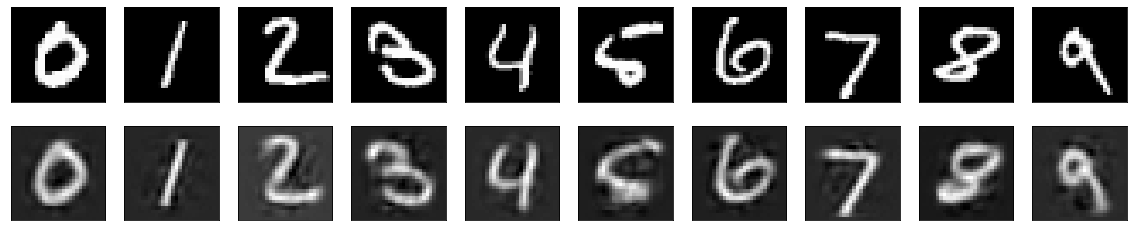

In [4]:
# Encoded Data
encoded_train = encoder.predict(train_x)
encoded_test = encoder.predict(test_x)

# Reconstructed Data
reconstructed = autoencoder.predict(test_x)

n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    count = 0
    
    while True:
        if i == test_y[count]:
            # Original
            ax = plt.subplot(2, n, i + 1)
            plt.imshow(test_x[count].reshape(28, 28))
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            
            # Reconstructed
            ax = plt.subplot(2, n, i + 1 + n)
            plt.imshow(reconstructed[count].reshape(28, 28))
            plt.gray()
            
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            break;
            
        count += 1
plt.show()

For Linear - MSE. **After 100 epochs**, the amount of **loss/validation** is **0.0140/0.0145** MSE loss.

But if the prediction results are converted into images, the quality of reconstruction from Sigmoid - Cross-Entropy has better quality.